# Exercise 1 - Describe Numeric Data

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

### Generate numeric values and add outliers

In [2]:
n = 100

data = np.random.randint(1, 100, n)

indeces = np.random.randint(0, n, 2)
data[indeces] += 200

data

array([ 37,  17,  78,  51,  66,  68,   7,  23,  83,  57,  55, 243,  59,
        23,  60,  53,   8,  55,  84,  54,  70,  77,  44,  72,  57,  51,
         2,  98,  25,  47, 284,  17,  13,  39,  19,  75,  14,  75,  46,
        24,  87,  38,  21,  17,  65,  14,  96,  91,  92,  63,  73,  36,
        23,  75,  64,  81,  85,  35,  51,  25,  61,  59,   8,  94,  45,
        49,  63,  86,  44,  35,  82,   3,  91,  53,  76,  81,  99,   7,
        66,  38,  42,  76,  81,  11,  10,  84,  46,  19,  56,  69,  85,
        69,  98,  62,  73,  49,  42,  95,  25,  65])

### Define describe function

In [3]:
def mode(data):
    vals, counts = np.unique(data, return_counts=True)
    index = np.argmax(counts)
    return vals[index]

# or

import scipy.stats

def mode(data):
    return scipy.stats.mode(data).mode

In [4]:
def describe(data):
    n = len(data)
    q1, q3 = np.quantile(data, [0.25, 0.75])
    iqr = q3 - q1
    tukey_lower_bound = q1 - 1.5 * iqr
    tukey_upper_bound = q3 + 1.5 * iqr,
    outliers = data[(data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr)]
    return {
        'n': n,
        'minimum': data.min(),
        'maximum': data.max(),
        'mean': data.mean(),
        'median': np.median(data),
        'mode': scipy.stats.mode(data).mode,
        'std': data.std(),
        'q1': q1,
        'q3': q3,
        'iqr': iqr,
        'skewness': scipy.stats.skew(data),
        'kurtosis': scipy.stats.kurtosis(data),
        'tukey_lower_bound': tukey_lower_bound,
        'tukey_upper_bound': tukey_upper_bound,
        'number_of_outliers': len(outliers),
        'outliers': outliers
    }

### Use the function to describe the data

In [5]:
describe(data)

{'n': 100,
 'minimum': np.int64(2),
 'maximum': np.int64(284),
 'mean': np.float64(57.59),
 'median': np.float64(56.5),
 'mode': np.int64(17),
 'std': np.float64(39.74068318486737),
 'q1': np.float64(35.0),
 'q3': np.float64(76.0),
 'iqr': np.float64(41.0),
 'skewness': np.float64(2.6606220776714413),
 'kurtosis': np.float64(12.729663664963933),
 'tukey_lower_bound': np.float64(-26.5),
 'tukey_upper_bound': (np.float64(137.5),),
 'number_of_outliers': 2,
 'outliers': array([243, 284])}

In [6]:
scipy.stats.describe(data)

DescribeResult(nobs=100, minmax=(np.int64(2), np.int64(284)), mean=np.float64(57.59), variance=np.float64(1595.274646464647), skewness=np.float64(2.6606220776714413), kurtosis=np.float64(12.729663664963933))

### Plot the histogram, the boxplot and the kde plot

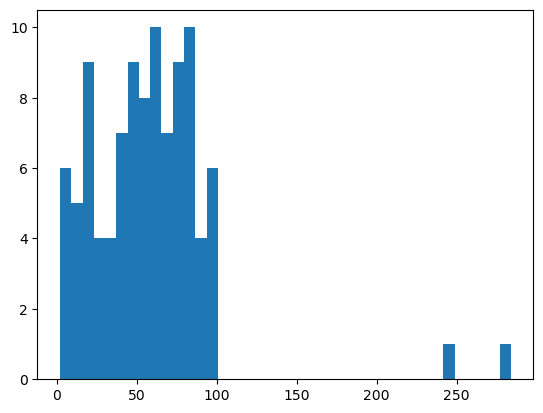

In [7]:
plt.hist(data, bins=40)
plt.show()

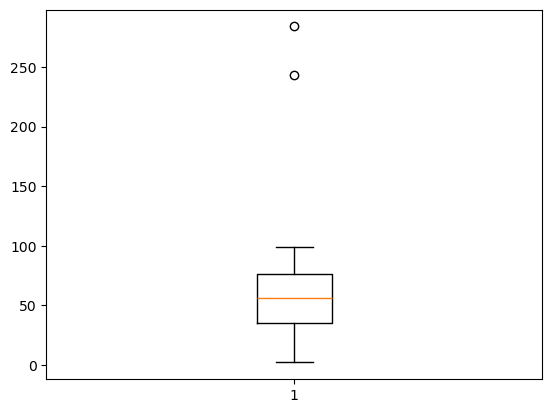

In [8]:
plt.boxplot(data)
plt.show()

<Axes: ylabel='Density'>

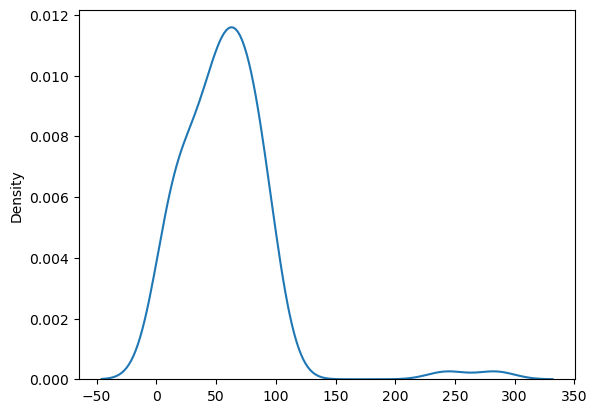

In [9]:
sns.kdeplot(data)

### The diamonds dataset

In [10]:
diamonds = sns.load_dataset("diamonds")
diamond_prices = diamonds["price"]

In [11]:
describe(diamond_prices)

{'n': 53940,
 'minimum': np.int64(326),
 'maximum': np.int64(18823),
 'mean': np.float64(3932.799721913237),
 'median': np.float64(2401.0),
 'mode': np.int64(605),
 'std': np.float64(3989.439738146379),
 'q1': np.float64(950.0),
 'q3': np.float64(5324.25),
 'iqr': np.float64(4374.25),
 'skewness': np.float64(1.6183502776053016),
 'kurtosis': np.float64(2.177382669056634),
 'tukey_lower_bound': np.float64(-5611.375),
 'tukey_upper_bound': (np.float64(11885.625),),
 'number_of_outliers': 3540,
 'outliers': 23820    11886
 23821    11886
 23822    11888
 23823    11888
 23824    11888
          ...  
 27745    18803
 27746    18804
 27747    18806
 27748    18818
 27749    18823
 Name: price, Length: 3540, dtype: int64}

In [12]:
scipy.stats.describe(diamond_prices)

DescribeResult(nobs=53940, minmax=(np.int64(326), np.int64(18823)), mean=np.float64(3932.799721913237), variance=np.float64(15915629.424301451), skewness=np.float64(1.6183502776053016), kurtosis=np.float64(2.177382669056634))

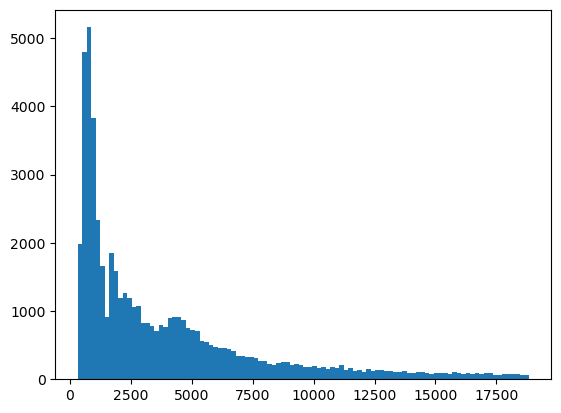

In [13]:
plt.hist(diamond_prices, bins=100)
plt.show()

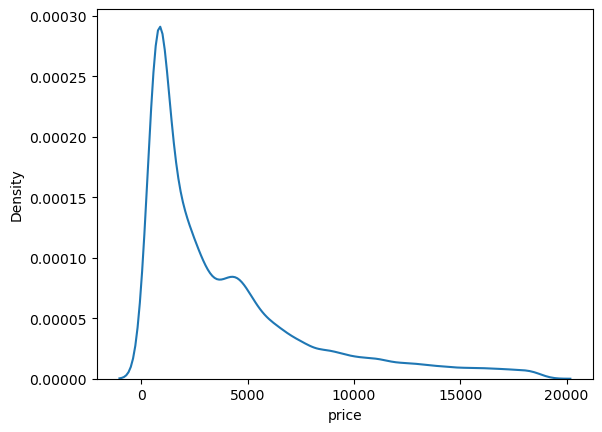

In [17]:
sns.kdeplot(diamond_prices)
plt.show()

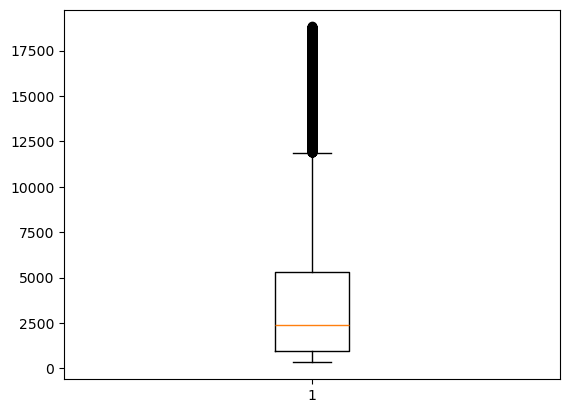

In [18]:
plt.boxplot(diamond_prices)
plt.show()